# Understanding the Dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #to plot charts

In [2]:
# reading the data
diabetes_data = pd.read_csv("diabetes.csv")
# printing data sample
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
1531,10,101,76,48,180,32.9,0.171,63,0
1532,2,122,70,27,0,36.8,0.340,27,0
1533,5,121,72,23,112,26.2,0.245,30,0
1534,1,126,60,0,0,30.1,0.349,47,1


In [3]:
diabetes_data.shape
# shape of dataset

(1536, 9)

# Analyzing columns

In [4]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
diabetes_data.dtypes
#data types in columns

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1536 non-null   int64  
 1   Glucose                   1536 non-null   int64  
 2   BloodPressure             1536 non-null   int64  
 3   SkinThickness             1536 non-null   int64  
 4   Insulin                   1536 non-null   int64  
 5   BMI                       1536 non-null   float64
 6   DiabetesPedigreeFunction  1536 non-null   float64
 7   Age                       1536 non-null   int64  
 8   Outcome                   1536 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 108.1 KB


In [7]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.368480,31.962202,19.349501,15.947021,115.206457,7.881592,0.331221,11.756400,0.476796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Visualizing the data

<Axes: xlabel='Outcome', ylabel='count'>

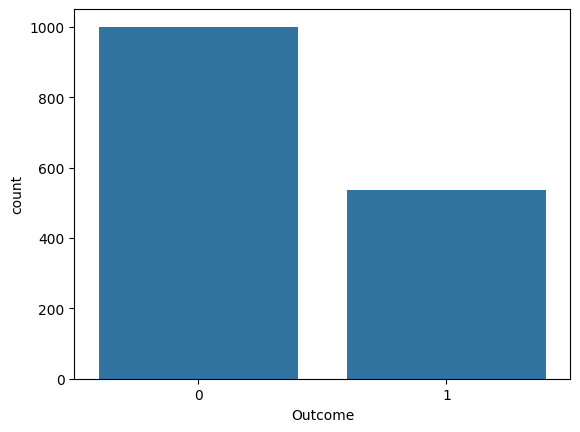

In [8]:
import seaborn as sns #used for data visualization

sns.countplot(x='Outcome', data=diabetes_data)
# the column in x is the result column

### We have around 250 pateints who have been diagnosed with diabetes and nearly 500 with no diabetes.

# Showing the Co-relation matrix

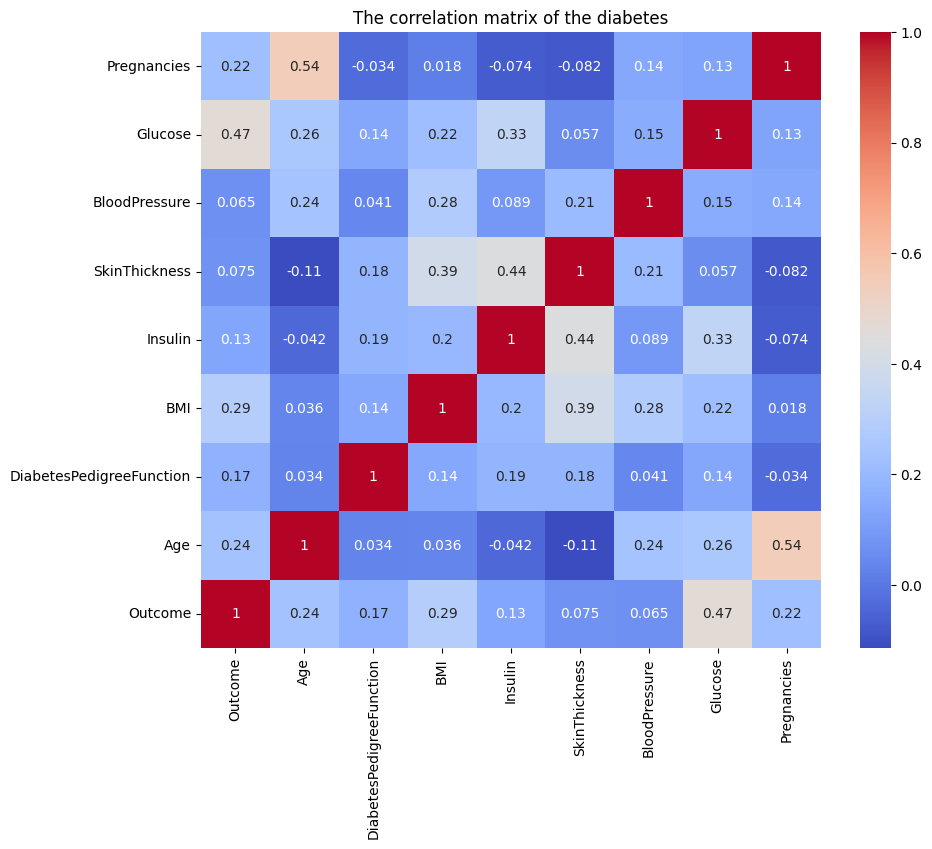

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming diabetes_data is your DataFrame
corrmat = diabetes_data.corr()

# Reverse the order of columns (x-axis)
corrmat_reversed_x = corrmat.iloc[:, ::-1]

# Create a heatmap using matplotlib
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat_reversed_x, annot=True,  cmap='coolwarm')
plt.title('The correlation matrix of the diabetes')
plt.show()

## Important Findings -
### Highest correlation - Outcome and Glucose
### Lowest correlation - Outcome AND BloodPressure

In [10]:
column = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
          'BMI', 'DiabetesPedigreeFunction', 'Age']
# the score values are taken from the above co-relation matrix
score = [0.22, 0.47, 0.065, 0.075, 0.13, 0.29, 0.17, 0.24]

<BarContainer object of 8 artists>

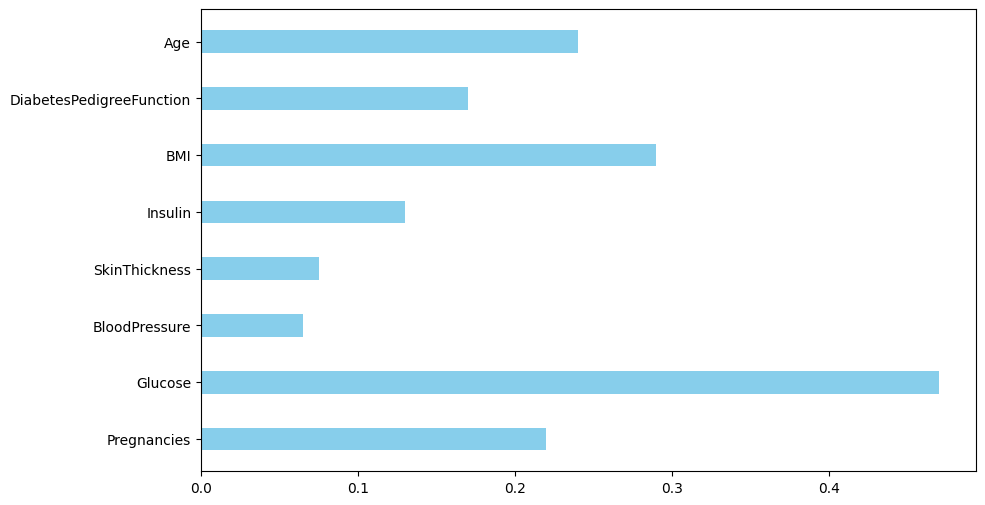

In [11]:
plt.figure(figsize=(10, 6))
plt.barh(column, score, height=0.4, label='Feature importance of each of the attributes', color='skyblue')

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




## Processing Data

### Checking nulls

In [12]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                      10
BloodPressure                70
SkinThickness               454
Insulin                     748
BMI                          22
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### We have some columns that need to be filled with some values for a proper model training.
### To select the values we will need to have a look at the distribution of the data.

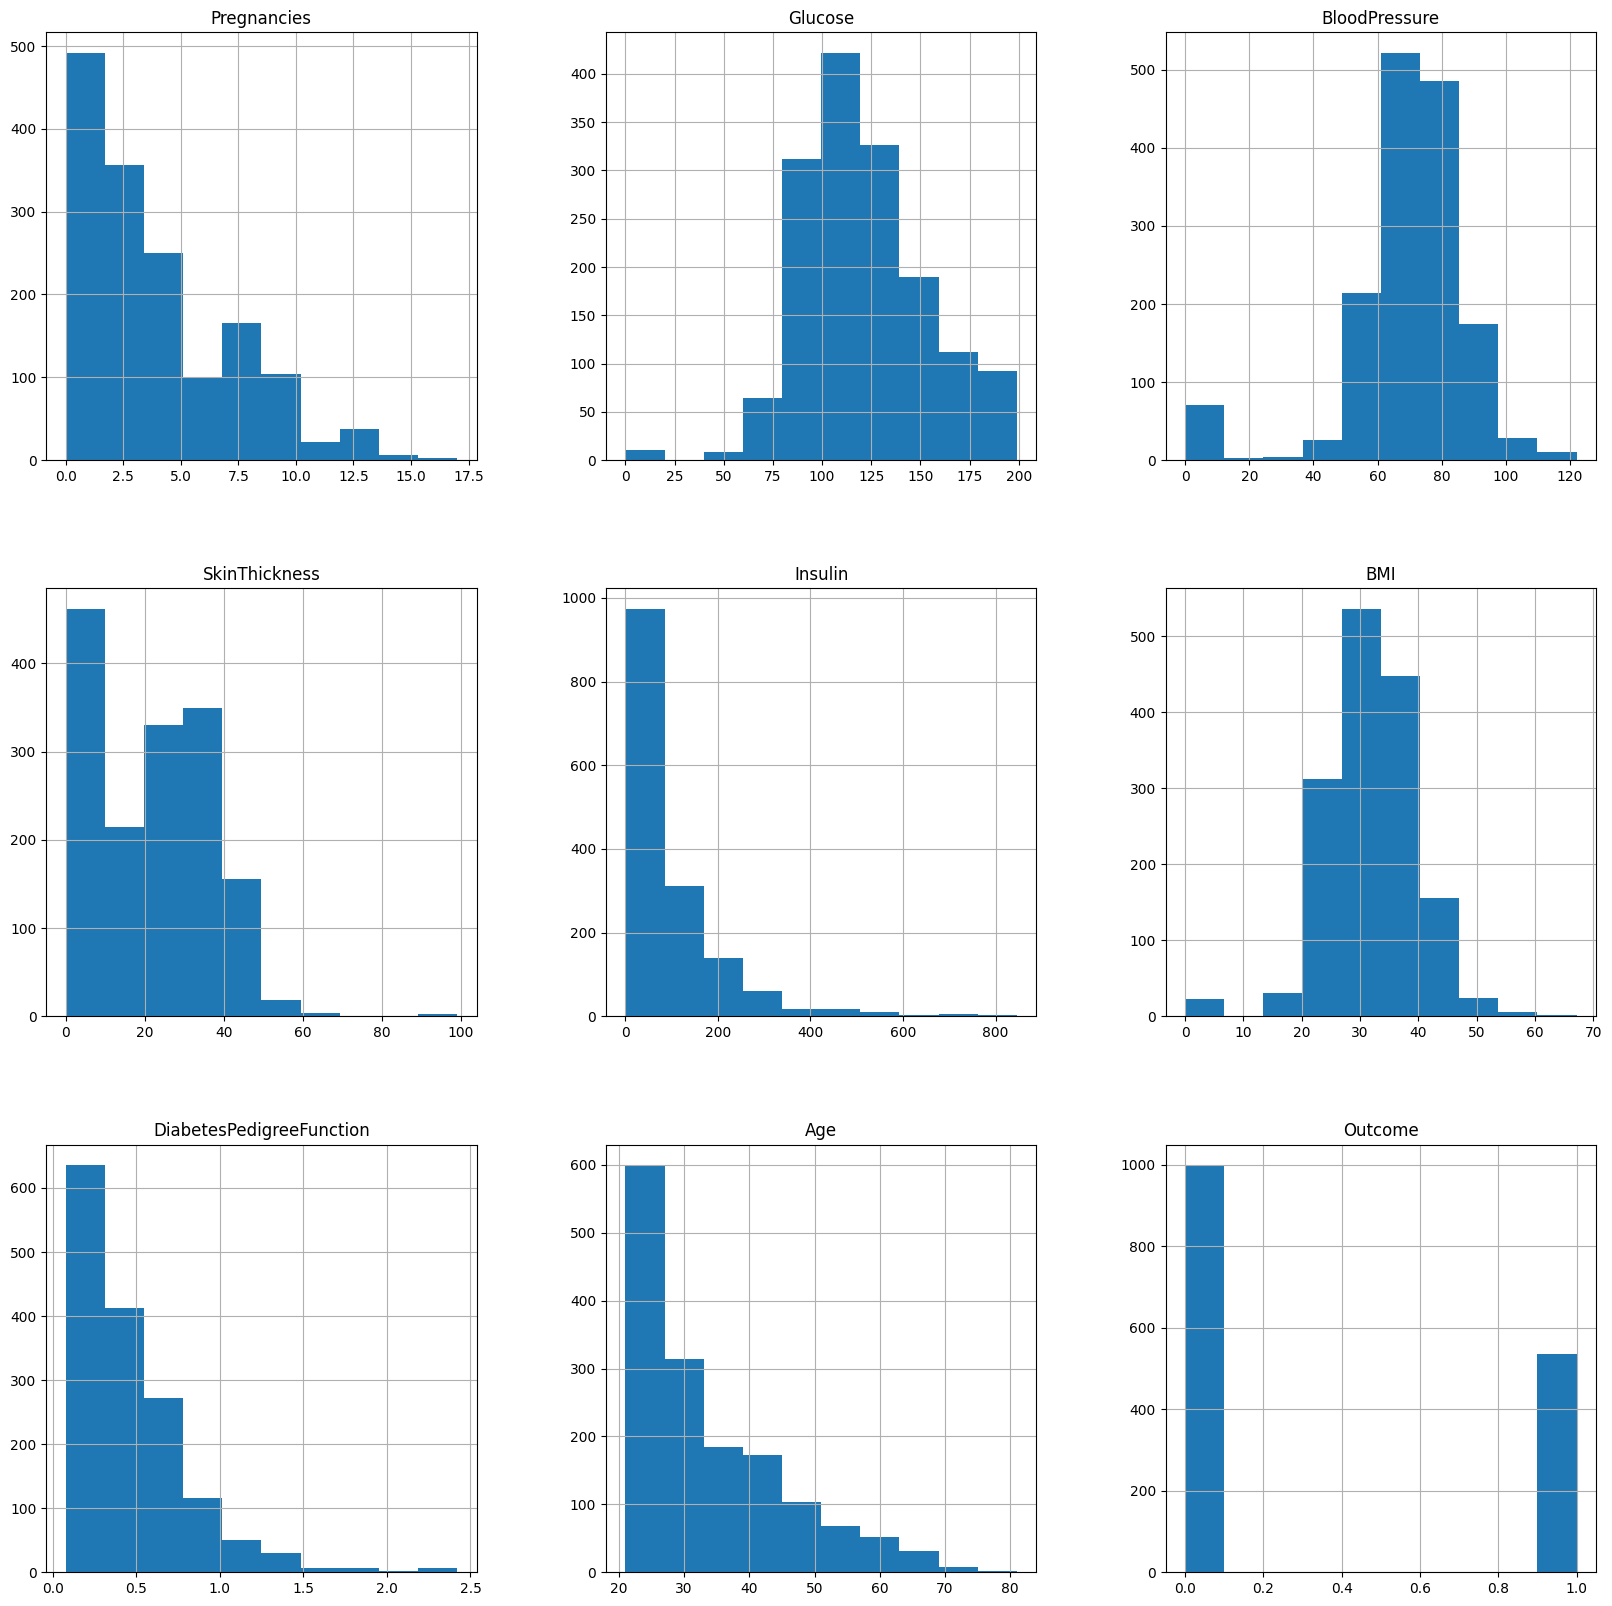

In [13]:
p = diabetes_data.hist(figsize = (20,20))

## For our data -
### If we have a normal distribution - We take in the mean
### If we have a skewed distribution - We take in the median

In [14]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_17400\3056448737.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_17400\3056448737.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [15]:
print(diabetes_data_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [16]:
diabetes_data_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
1531,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
1532,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
1533,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
1534,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


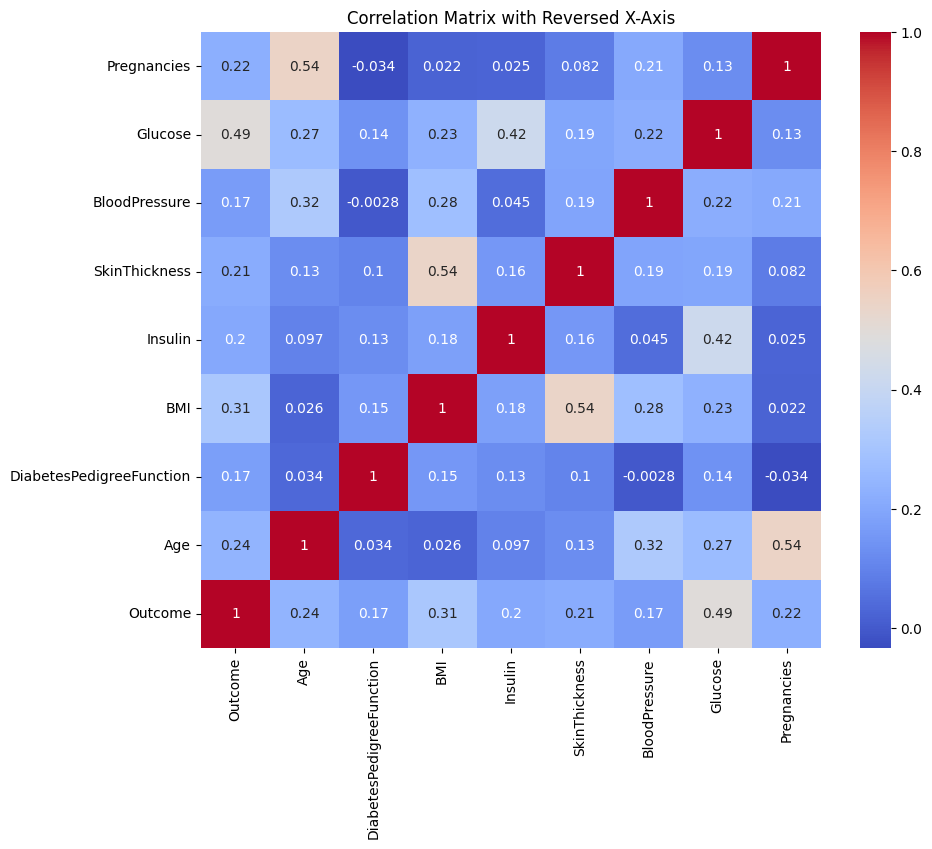

In [17]:
# Assuming diabetes_data is your DataFrame
corrmat = diabetes_data_copy.corr()

# Reverse the order of columns (x-axis)
corrmat_reversed_x = corrmat.iloc[:, ::-1]

# Create a heatmap using matplotlib
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat_reversed_x, annot=True,  cmap='coolwarm')
plt.title('Correlation Matrix with Reversed X-Axis')
plt.show()

In [18]:
processed_data = diabetes_data_copy
processed_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
1531,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
1532,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
1533,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
1534,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


## SHAP analysis with xgboost as used in the research paper

In [19]:
# !pip install xgboost

In [20]:
import xgboost as xgb
import shap
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming diabetes_data is your DataFrame with 'Outcome' as the target variable
X = processed_data.drop('Outcome', axis=1)
y = processed_data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Create an XGBoost classifier
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

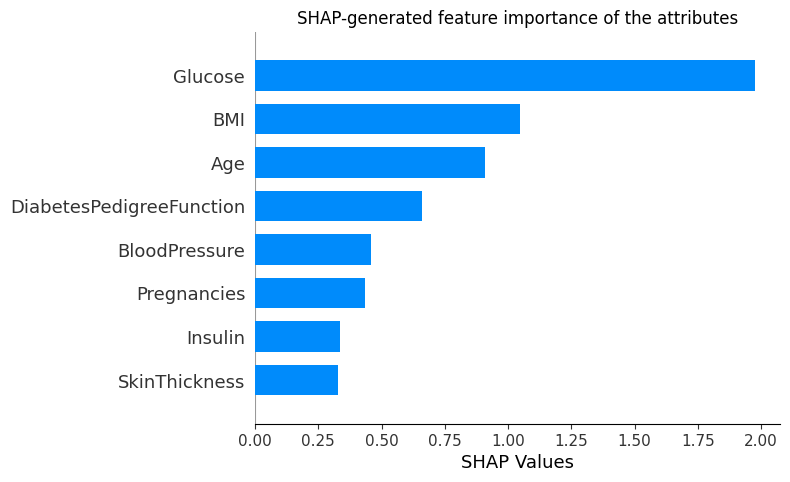

In [22]:
# Create a SHAP explainer for the XGBoost model
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot
# shap.summary_plot(shap_values, X_test, feature_names=X.columns)
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar", show=False)
plt.title('SHAP-generated feature importance of the attributes')
plt.xlabel('SHAP Values')
plt.show()

## Creating combined data

In [23]:
processed_data_without_outcome = processed_data.drop('Outcome', axis=1)
y = processed_data['Outcome']
processed_data_without_outcome

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
1531,10,101.0,76.0,48.0,180.0,32.9,0.171,63
1532,2,122.0,70.0,27.0,125.0,36.8,0.340,27
1533,5,121.0,72.0,23.0,112.0,26.2,0.245,30
1534,1,126.0,60.0,29.0,125.0,30.1,0.349,47


In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from itertools import combinations

# Normalize the processed dataset
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(processed_data_without_outcome), columns=processed_data_without_outcome.columns)

# Combine each column with every other column
combined_data = pd.concat([normalized_data] + [
    pd.DataFrame({f"{col1} {col2}": normalized_data[col1] * normalized_data[col2]})
    for col1, col2 in combinations(normalized_data.columns, 2)
], axis=1)

# Display the combined dataset with the new columns added
combined_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies Glucose,Pregnancies BloodPressure,...,SkinThickness Insulin,SkinThickness BMI,SkinThickness DiabetesPedigreeFunction,SkinThickness Age,Insulin BMI,Insulin DiabetesPedigreeFunction,Insulin Age,BMI DiabetesPedigreeFunction,BMI Age,DiabetesPedigreeFunction Age
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333,0.236812,0.172869,...,0.040604,0.095848,0.071344,0.147101,0.042016,0.031274,0.064483,0.073824,0.152215,0.113301
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667,0.015560,0.025210,...,0.031903,0.041078,0.027875,0.039855,0.022918,0.015552,0.022236,0.020024,0.028630,0.019428
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333,0.422011,0.192077,...,0.031903,0.024940,0.060651,0.043841,0.013914,0.033838,0.024459,0.026452,0.019121,0.046499
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.017078,0.025210,...,0.016722,0.035209,0.006609,0.000000,0.019467,0.003654,0.000000,0.007694,0.000000,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,0.000000,0.000000,...,0.056334,0.154975,0.287194,0.060870,0.094251,0.174664,0.037019,0.480503,0.101840,0.188728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0.216319,0.312125,...,0.088916,0.133969,0.017697,0.311957,0.059978,0.007923,0.139663,0.011937,0.210429,0.027797
1532,0.117647,0.503226,0.469388,0.217391,0.133413,0.380368,0.111870,0.100000,0.059203,0.055222,...,0.029003,0.082689,0.024320,0.021739,0.050746,0.014925,0.013341,0.042552,0.038037,0.011187
1533,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0.146110,0.144058,...,0.020485,0.028452,0.012401,0.026087,0.019270,0.008399,0.017668,0.011666,0.024540,0.010696
1534,0.058824,0.529032,0.367347,0.239130,0.133413,0.243354,0.115713,0.433333,0.031120,0.021609,...,0.031903,0.058193,0.027671,0.103623,0.032467,0.015438,0.057813,0.028159,0.105453,0.050142


## I have our 36 features dataset.
## Again using xgboost and snap to get the top 20

In [25]:
X_train, X_test, y_train, y_test = train_test_split(combined_data, y, test_size=0.2, random_state=42)

In [26]:
# !pip install shap

In [27]:
# Create an XGBoost classifier
import xgboost as xgb
import shap
import pandas as pd
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

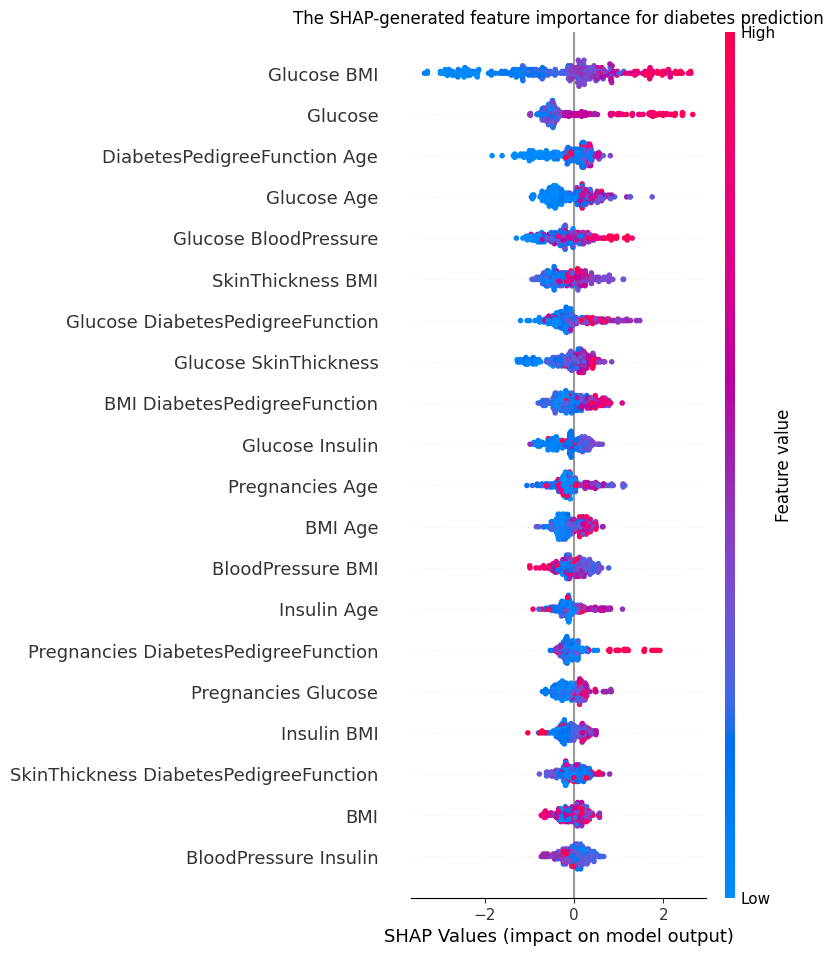

In [28]:
# Create a SHAP explainer for the XGBoost model
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=combined_data.columns, show=False)
plt.title('The SHAP-generated feature importance for diabetes prediction')
plt.xlabel('SHAP Values (impact on model output)')
plt.show()

In [29]:
# Calculate the absolute mean of SHAP values for each feature
feature_scores = np.abs(shap_values).mean(axis=0)

# Create a DataFrame to store the feature scores
feature_scores_df = pd.DataFrame({'Feature': combined_data.columns, 'Feature Score': feature_scores})

# Sort the DataFrame by Feature Score in descending order
feature_scores_df = feature_scores_df.sort_values(by='Feature Score', ascending=False)
feature_scores_df

,Feature,Feature Score
18,Glucose BMI,1.121366
1,Glucose,0.683465
35,DiabetesPedigreeFunction Age,0.397131
20,Glucose Age,0.392096
15,Glucose BloodPressure,0.388567
27,SkinThickness BMI,0.360555
19,Glucose DiabetesPedigreeFunction,0.354408
16,Glucose SkinThickness,0.348840
33,BMI DiabetesPedigreeFunction,0.300759
17,Glucose Insulin,0.275722


In [30]:
top_15_features = feature_scores_df['Feature'].head(15).tolist()
top_15_features

['Glucose BMI',
 'Glucose',
 'DiabetesPedigreeFunction Age',
 'Glucose Age',
 'Glucose BloodPressure',
 'SkinThickness BMI',
 'Glucose DiabetesPedigreeFunction',
 'Glucose SkinThickness',
 'BMI DiabetesPedigreeFunction',
 'Glucose Insulin',
 'Pregnancies Age',
 'BMI Age',
 'BloodPressure BMI',
 'Insulin Age',
 'Pregnancies DiabetesPedigreeFunction']

### It is clear from the above graph that - Glucose and BMI are the most importanat features for us

In [31]:
columns_to_use = ['Glucose Age', 'Glucose', 'Glucose BMI', 'BloodPressure BMI', 'BMI', 'BMI Age', 'Glucose Insulin', 'Insulin DiabetesPedigreeFunction',
 'Pregnancies DiabetesPedigreeFunction', 'Glucose SkinThickness', 'Insulin BMI', 'Glucose DiabetesPedigreeFunction', 'BloodPressure Age', 'Glucose BloodPressure',
 'BloodPressure SkinThickness']

In [32]:
top_15_features.pop()
top_15_features.append('BMI')

In [33]:
top_15_features

['Glucose BMI',
 'Glucose',
 'DiabetesPedigreeFunction Age',
 'Glucose Age',
 'Glucose BloodPressure',
 'SkinThickness BMI',
 'Glucose DiabetesPedigreeFunction',
 'Glucose SkinThickness',
 'BMI DiabetesPedigreeFunction',
 'Glucose Insulin',
 'Pregnancies Age',
 'BMI Age',
 'BloodPressure BMI',
 'Insulin Age',
 'BMI']

In [34]:
len(columns_to_use)

15

In [35]:
copy = top_15_features  
# top_15_features = top_15_features[:10]

# Selecting the columns as per the use-case

In [36]:
# Get the feature importance values for the specified columns
feature_importance_values = []

for col in top_15_features:
    index = combined_data.columns.get_loc(col)
    importance_value = abs(shap_values[:, index]).mean()
    feature_importance_values.append(importance_value)

# Display the feature importance values
result_df = pd.DataFrame({'Column Combination': top_15_features, 'Feature Importance Value': feature_importance_values})
print(result_df)

                  Column Combination  Feature Importance Value
0                        Glucose BMI                  1.121366
1                            Glucose                  0.683465
2       DiabetesPedigreeFunction Age                  0.397131
3                        Glucose Age                  0.392097
4              Glucose BloodPressure                  0.388567
5                  SkinThickness BMI                  0.360555
6   Glucose DiabetesPedigreeFunction                  0.354408
7              Glucose SkinThickness                  0.348840
8       BMI DiabetesPedigreeFunction                  0.300759
9                    Glucose Insulin                  0.275722
10                   Pregnancies Age                  0.265803
11                           BMI Age                  0.260880
12                 BloodPressure BMI                  0.250929
13                       Insulin Age                  0.250551
14                               BMI                  0

In [37]:
top_15_features.pop()
top_15_features.append('BMI')

In [38]:
top_15_features

['Glucose BMI',
 'Glucose',
 'DiabetesPedigreeFunction Age',
 'Glucose Age',
 'Glucose BloodPressure',
 'SkinThickness BMI',
 'Glucose DiabetesPedigreeFunction',
 'Glucose SkinThickness',
 'BMI DiabetesPedigreeFunction',
 'Glucose Insulin',
 'Pregnancies Age',
 'BMI Age',
 'BloodPressure BMI',
 'Insulin Age',
 'BMI']

In [39]:
sorted_df = result_df.sort_values(by='Feature Importance Value')

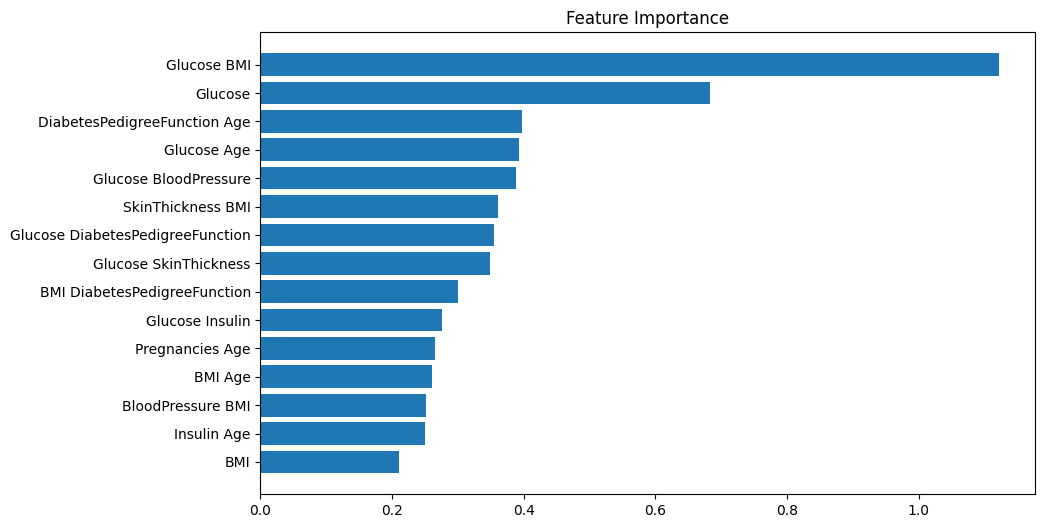

In [40]:
# Plotting two columns in a bar graph
plt.figure(figsize=(10, 6))
plt.barh(sorted_df['Column Combination'], sorted_df['Feature Importance Value'])
plt.title('Feature Importance')
plt.show()

## We have finalized out columns.

In [41]:
final_dataset = combined_data[top_15_features]
final_dataset['Outcome'] = processed_data['Outcome']
final_dataset


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Glucose BMI,Glucose,DiabetesPedigreeFunction Age,Glucose Age,Glucose BloodPressure,SkinThickness BMI,Glucose DiabetesPedigreeFunction,Glucose SkinThickness,BMI DiabetesPedigreeFunction,Glucose Insulin,Pregnancies Age,BMI Age,BloodPressure BMI,Insulin Age,BMI,Outcome
0,0.211307,0.670968,0.113301,0.324301,0.328637,0.095848,0.157285,0.204208,0.073824,0.089516,0.170588,0.152215,0.154251,0.064483,0.314928,1
1,0.045438,0.264516,0.019428,0.044086,0.113364,0.041078,0.030834,0.063254,0.020024,0.035290,0.009804,0.028630,0.073620,0.022236,0.171779,0
2,0.093529,0.896774,0.046499,0.164409,0.366030,0.024940,0.227448,0.214446,0.026452,0.119642,0.086275,0.019121,0.042569,0.024459,0.104294,1
3,0.058777,0.290323,0.000000,0.000000,0.124424,0.035209,0.011033,0.050491,0.007694,0.027916,0.000000,0.000000,0.086766,0.000000,0.202454,0
4,0.305521,0.600000,0.188728,0.120000,0.097959,0.154975,0.566183,0.182609,0.480503,0.111058,0.000000,0.101840,0.083135,0.037019,0.509202,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,0.110548,0.367742,0.027797,0.257419,0.195128,0.133969,0.014603,0.163885,0.011937,0.073372,0.411765,0.210429,0.159509,0.139663,0.300613,0
1532,0.191411,0.503226,0.011187,0.050323,0.236208,0.082689,0.056296,0.109397,0.042552,0.067137,0.011765,0.038037,0.178540,0.013341,0.380368,0
1533,0.081272,0.496774,0.010696,0.074516,0.243318,0.028452,0.035423,0.086396,0.011666,0.058514,0.044118,0.024540,0.080130,0.017668,0.163599,0
1534,0.128742,0.529032,0.050142,0.229247,0.194338,0.058193,0.061216,0.126508,0.028159,0.070580,0.025490,0.105453,0.089395,0.057813,0.243354,1


In [42]:
final_dataset.to_csv('final_dataset.csv')

In [43]:
import pandas as pd

# reading the data
final_diabetes_data = pd.read_csv("final_dataset.csv", index_col=0)

# printing data sample
final_diabetes_data

,Glucose BMI,Glucose,DiabetesPedigreeFunction Age,Glucose Age,Glucose BloodPressure,SkinThickness BMI,Glucose DiabetesPedigreeFunction,Glucose SkinThickness,BMI DiabetesPedigreeFunction,Glucose Insulin,Pregnancies Age,BMI Age,BloodPressure BMI,Insulin Age,BMI,Outcome
0,0.211307,0.670968,0.113301,0.324301,0.328637,0.095848,0.157285,0.204208,0.073824,0.089516,0.170588,0.152215,0.154251,0.064483,0.314928,1
1,0.045438,0.264516,0.019428,0.044086,0.113364,0.041078,0.030834,0.063254,0.020024,0.035290,0.009804,0.028630,0.073620,0.022236,0.171779,0
2,0.093529,0.896774,0.046499,0.164409,0.366030,0.024940,0.227448,0.214446,0.026452,0.119642,0.086275,0.019121,0.042569,0.024459,0.104294,1
3,0.058777,0.290323,0.000000,0.000000,0.124424,0.035209,0.011033,0.050491,0.007694,0.027916,0.000000,0.000000,0.086766,0.000000,0.202454,0
4,0.305521,0.600000,0.188728,0.120000,0.097959,0.154975,0.566183,0.182609,0.480503,0.111058,0.000000,0.101840,0.083135,0.037019,0.509202,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,0.110548,0.367742,0.027797,0.257419,0.195128,0.133969,0.014603,0.163885,0.011937,0.073372,0.411765,0.210429,0.159509,0.139663,0.300613,0
1532,0.191411,0.503226,0.011187,0.050323,0.236208,0.082689,0.056296,0.109397,0.042552,0.067137,0.011765,0.038037,0.178540,0.013341,0.380368,0
1533,0.081272,0.496774,0.010696,0.074516,0.243318,0.028452,0.035423,0.086396,0.011666,0.058514,0.044118,0.024540,0.080130,0.017668,0.163599,0
1534,0.128742,0.529032,0.050142,0.229247,0.194338,0.058193,0.061216,0.126508,0.028159,0.070580,0.025490,0.105453,0.089395,0.057813,0.243354,1


In [44]:
from sklearn.model_selection import train_test_split

final_diabetes_data = final_dataset
X = final_diabetes_data.drop('Outcome', axis=1)
y = final_diabetes_data['Outcome']

# Split the data into training (60%), validation (20%), and testing (20%) as per the paper
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=8)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=8)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (921, 15) (921,)
Validation set shape: (307, 15) (307,)
Testing set shape: (308, 15) (308,)


In [45]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


# Create and train the Extra Trees Classifier
extra_trees_model = ExtraTreesClassifier(random_state=42)
extra_trees_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = extra_trees_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9123376623376623


In [46]:
# !pip install imblearn

# Extra Trees Classifier

In [47]:
test_accuracy_list = []
test_f1_list = []
validation_accuracy_list = []
validation_f1_list = []
test_auc_list = []

In [48]:
# Extracting values from the confusion matrix
TN_list = []
FP_list = []
FN_list = []
TP_list = []

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
import numpy as np

# Create and train ExtraTreesClassifier
extra_trees_classifier = ExtraTreesClassifier(random_state=100)
extra_trees_classifier.fit(X_train, y_train)

# Predictions on the validation set
y_valid_pred = extra_trees_classifier.predict(X_valid)

# Compute metrics on the validation set
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
valid_f1 = f1_score(y_valid, y_valid_pred)

# Append validation set metrics to lists
validation_accuracy_list.append(valid_accuracy)
validation_f1_list.append(valid_f1)

print("Metrics on Validation Set:")
print(f"Accuracy: {valid_accuracy:.4f}")
print(f"F1 Score: {valid_f1:.4f}")

# Predictions on the test set
y_test_pred = extra_trees_classifier.predict(X_test)

# Compute metrics on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
test_accuracy_list.append(test_accuracy)
test_f1_list.append(test_f1)

# Calculate AUC score
y_test_proba = extra_trees_classifier.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_proba)
test_auc_list.append(test_auc)

print("\nMetrics on Test Set:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"AUC Score: {test_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Metrics on Validation Set:
Accuracy: 0.9349
F1 Score: 0.9194

Metrics on Test Set:
Accuracy: 0.9026
F1 Score: 0.8585
AUC Score: 0.9730
Confusion Matrix:
[[187  17]
 [ 13  91]]


In [50]:
# Extracting values from the confusion matrix
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives
TP = conf_matrix[1, 1]  # True Positives

print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("True Positives:", TP)

TN_list.append(TN)
FP_list.append(FP)
FN_list.append(FN)
TP_list.append(TP)

True Negatives: 187
False Positives: 17
False Negatives: 13
True Positives: 91


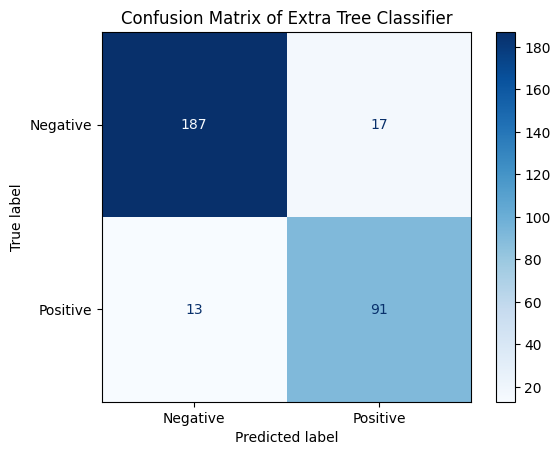

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Take individual inputs
tn = 187
fp = 17
fn = 13
tp = 91

# Create the confusion matrix manually
cm = np.array([[tn, fp],
               [fn, tp]])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Extra Tree Classifier")
plt.show()

# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
import numpy as np

# Create and train RandomForestClassifier
random_forest_classifier = RandomForestClassifier(random_state=100)
random_forest_classifier.fit(X_train, y_train)

# Predictions on the validation set
y_valid_pred = random_forest_classifier.predict(X_valid)

# Compute metrics on the validation set
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
valid_f1 = f1_score(y_valid, y_valid_pred)

# Append validation set metrics to lists
validation_accuracy_list.append(valid_accuracy)
validation_f1_list.append(valid_f1)

print("Metrics on Validation Set:")
print(f"Accuracy: {valid_accuracy:.4f}")
print(f"F1 Score: {valid_f1:.4f}")

# Predictions on the test set
y_test_pred = random_forest_classifier.predict(X_test)

# Compute metrics on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
test_accuracy_list.append(test_accuracy)
test_f1_list.append(test_f1)

# Calculate AUC score
y_test_proba = random_forest_classifier.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_proba)
test_auc_list.append(test_auc)

print("\nMetrics on Test Set:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"AUC Score: {test_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Metrics on Validation Set:
Accuracy: 0.9446
F1 Score: 0.9312

Metrics on Test Set:
Accuracy: 0.9253
F1 Score: 0.8910
AUC Score: 0.9556
Confusion Matrix:
[[191  13]
 [ 10  94]]


In [52]:
# Extracting values from the confusion matrix
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives
TP = conf_matrix[1, 1]  # True Positives

print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("True Positives:", TP)

TN_list.append(TN)
FP_list.append(FP)
FN_list.append(FN)
TP_list.append(TP)

True Negatives: 191
False Positives: 13
False Negatives: 10
True Positives: 94


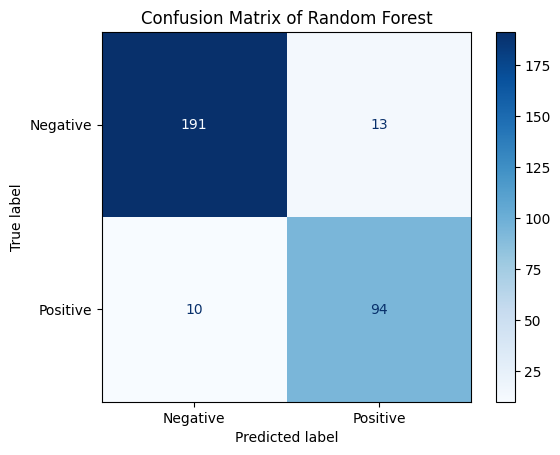

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Take individual inputs
tn = 191
fp = 13
fn = 10
tp = 94

# Create the confusion matrix manually
cm = np.array([[tn, fp],
               [fn, tp]])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Random Forest")
plt.show()

# Adaboost

In [53]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
import numpy as np

# Create and train AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(random_state=100)
adaboost_classifier.fit(X_train, y_train)

# Predictions on the validation set
y_valid_pred = adaboost_classifier.predict(X_valid)

# Compute metrics on the validation set
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
valid_f1 = f1_score(y_valid, y_valid_pred)

# Append validation set metrics to lists
validation_accuracy_list.append(valid_accuracy)
validation_f1_list.append(valid_f1)

print("Metrics on Validation Set:")
print(f"Accuracy: {valid_accuracy:.4f}")
print(f"F1 Score: {valid_f1:.4f}")

# Predictions on the test set
y_test_pred = adaboost_classifier.predict(X_test)

# Compute metrics on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
test_accuracy_list.append(test_accuracy)
test_f1_list.append(test_f1)

# Calculate AUC score
y_test_proba = adaboost_classifier.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_proba)
test_auc_list.append(test_auc)

print("\nMetrics on Test Set:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"AUC Score: {test_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Metrics on Validation Set:
Accuracy: 0.8274
F1 Score: 0.7725

Metrics on Test Set:
Accuracy: 0.8344
F1 Score: 0.7583
AUC Score: 0.9043
Confusion Matrix:
[[177  27]
 [ 24  80]]


The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


In [54]:
# Extracting values from the confusion matrix
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives
TP = conf_matrix[1, 1]  # True Positives

print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("True Positives:", TP)

TN_list.append(TN)
FP_list.append(FP)
FN_list.append(FN)
TP_list.append(TP)

True Negatives: 177
False Positives: 27
False Negatives: 24
True Positives: 80


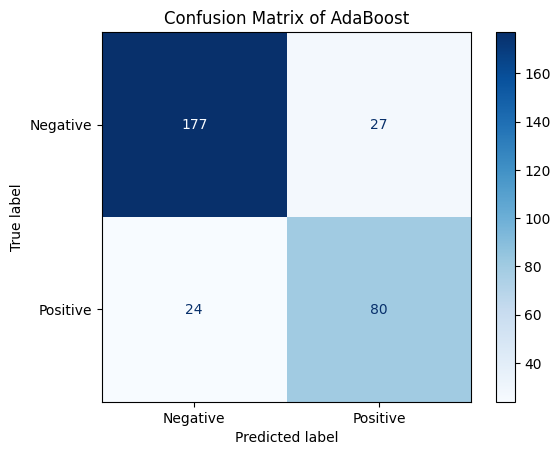

In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Take individual inputs
tn = 177
fp = 27
fn = 24
tp = 80

# Create the confusion matrix manually
cm = np.array([[tn, fp],
               [fn, tp]])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of AdaBoost")
plt.show()

# Gradient Boosting

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
import numpy as np

# Create and train GradientBoostingClassifier
gradient_boosting_classifier = GradientBoostingClassifier(random_state=100)
gradient_boosting_classifier.fit(X_train, y_train)

# Predictions on the validation set
y_valid_pred = gradient_boosting_classifier.predict(X_valid)

# Compute metrics on the validation set
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
valid_f1 = f1_score(y_valid, y_valid_pred)

# Append validation set metrics to lists
validation_accuracy_list.append(valid_accuracy)
validation_f1_list.append(valid_f1)

print("Metrics on Validation Set:")
print(f"Accuracy: {valid_accuracy:.4f}")
print(f"F1 Score: {valid_f1:.4f}")

# Predictions on the test set
y_test_pred = gradient_boosting_classifier.predict(X_test)

# Compute metrics on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
test_accuracy_list.append(test_accuracy)
test_f1_list.append(test_f1)

# Calculate AUC score
y_test_proba = gradient_boosting_classifier.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_proba)
test_auc_list.append(test_auc)

print("\nMetrics on Test Set:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"AUC Score: {test_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Metrics on Validation Set:
Accuracy: 0.8958
F1 Score: 0.8667

Metrics on Test Set:
Accuracy: 0.9156
F1 Score: 0.8750
AUC Score: 0.9289
Confusion Matrix:
[[191  13]
 [ 13  91]]


In [56]:
# Extracting values from the confusion matrix
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives
TP = conf_matrix[1, 1]  # True Positives

print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("True Positives:", TP)

TN_list.append(TN)
FP_list.append(FP)
FN_list.append(FN)
TP_list.append(TP)

True Negatives: 191
False Positives: 13
False Negatives: 13
True Positives: 91


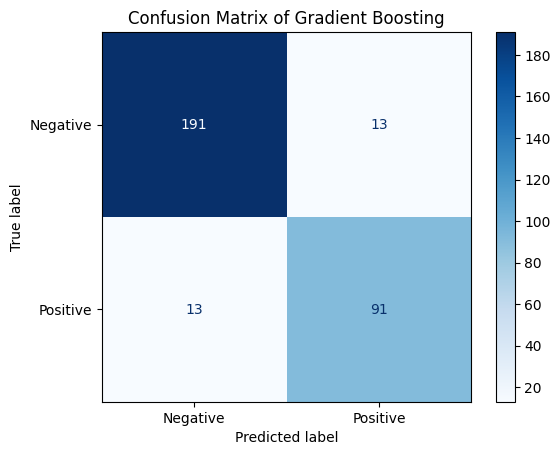

In [4]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Take individual inputs
tn = 191
fp = 13
fn = 13
tp = 91

# Create the confusion matrix manually
cm = np.array([[tn, fp],
               [fn, tp]])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Gradient Boosting")
plt.show()

In [57]:
print(test_accuracy_list)
print(test_f1_list)
print(validation_accuracy_list)
print(validation_f1_list)
print(test_auc_list)

print(TN_list)
print(FP_list)
print(FN_list)
print(TP_list)

[0.9025974025974026, 0.9253246753246753, 0.8344155844155844, 0.9155844155844156]
[0.8584905660377359, 0.8909952606635071, 0.7582938388625592, 0.875]
[0.9348534201954397, 0.9446254071661238, 0.8273615635179153, 0.8957654723127035]
[0.9193548387096774, 0.9311740890688259, 0.7725321888412017, 0.8666666666666667]
[0.9730392156862746, 0.9555524132730014, 0.9042703619909502, 0.9288744343891402]
[187, 191, 177, 191]
[17, 13, 27, 13]
[13, 10, 24, 13]
[91, 94, 80, 91]


In [58]:
import pandas as pd

# Combine lists into a dictionary
data = {
    'Model': ['Extra Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting'],
    'Validation Accuracy': validation_accuracy_list,
    'Validation F1 Score': validation_f1_list,
    'Test Accuracy': test_accuracy_list,
    'Test F1 Score': test_f1_list,
    'Test AUC Score': test_auc_list,
    'True Negative': TN_list,
    'False Positive': FP_list,
    'False Negative': FN_list,
    'True Positive': TP_list,
}

# Create a DataFrame
metrics_df = pd.DataFrame(data)

# Display the DataFrame
metrics_df

,Model,Validation Accuracy,Validation F1 Score,Test Accuracy,Test F1 Score,Test AUC Score,True Negative,False Positive,False Negative,True Positive
0,Extra Tree,0.934853,0.919355,0.902597,0.858491,0.973039,187,17,13,91
1,Random Forest,0.944625,0.931174,0.925325,0.890995,0.955552,191,13,10,94
2,AdaBoost,0.827362,0.772532,0.834416,0.758294,0.904270,177,27,24,80
3,Gradient Boosting,0.895765,0.866667,0.915584,0.875000,0.928874,191,13,13,91


In [59]:
metrics_df.to_csv('metrics_df.csv')

In [60]:
import pandas as pd

# reading the data
metrics_df = pd.read_csv("metrics_df.csv", index_col=0)

# printing data sample
metrics_df

,Model,Validation Accuracy,Validation F1 Score,Test Accuracy,Test F1 Score,Test AUC Score,True Negative,False Positive,False Negative,True Positive
0,Extra Tree,0.934853,0.919355,0.902597,0.858491,0.973039,187,17,13,91
1,Random Forest,0.944625,0.931174,0.925325,0.890995,0.955552,191,13,10,94
2,AdaBoost,0.827362,0.772532,0.834416,0.758294,0.904270,177,27,24,80
3,Gradient Boosting,0.895765,0.866667,0.915584,0.875000,0.928874,191,13,13,91


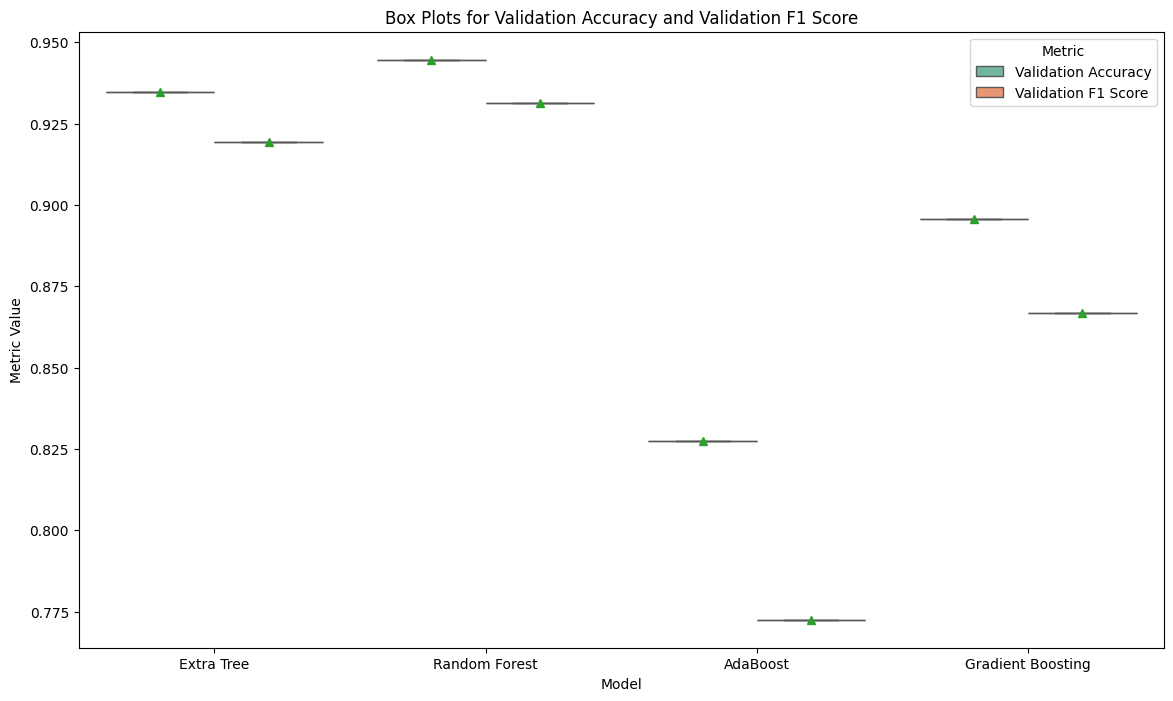

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

melted_metrics = pd.melt(metrics_df, id_vars=['Model'], value_vars=['Validation Accuracy', 'Validation F1 Score'])

# Create box plot with error bars
plt.figure(figsize=(14, 8))
sns.boxplot(x='Model', y='value', hue='variable', data=melted_metrics, palette='Set2', showfliers=False, showmeans=True)

# # Create box plot
# plt.figure(figsize=(14, 8))  # Adjust the figure size
# sns.boxplot(x='Model', y='value', hue='variable', data=melted_metrics, palette='Set2')
plt.title('Box Plots for Validation Accuracy and Validation F1 Score')
plt.ylabel('Metric Value')
plt.xlabel('Model')
plt.legend(title='Metric')
plt.show()


In [62]:
metrics_df

,Model,Validation Accuracy,Validation F1 Score,Test Accuracy,Test F1 Score,Test AUC Score,True Negative,False Positive,False Negative,True Positive
0,Extra Tree,0.934853,0.919355,0.902597,0.858491,0.973039,187,17,13,91
1,Random Forest,0.944625,0.931174,0.925325,0.890995,0.955552,191,13,10,94
2,AdaBoost,0.827362,0.772532,0.834416,0.758294,0.904270,177,27,24,80
3,Gradient Boosting,0.895765,0.866667,0.915584,0.875000,0.928874,191,13,13,91


In [63]:
melted_metrics

,Model,variable,value
0,Extra Tree,Validation Accuracy,0.934853
1,Random Forest,Validation Accuracy,0.944625
2,AdaBoost,Validation Accuracy,0.827362
3,Gradient Boosting,Validation Accuracy,0.895765
4,Extra Tree,Validation F1 Score,0.919355
5,Random Forest,Validation F1 Score,0.931174
6,AdaBoost,Validation F1 Score,0.772532
7,Gradient Boosting,Validation F1 Score,0.866667


In [64]:
[metrics_df['Validation Accuracy'].mean()]*4

[0.9006514657980456,
 0.9006514657980456,
 0.9006514657980456,
 0.9006514657980456]

In [65]:
metrics_df['Validation Accuracy Average'] = [metrics_df['Validation Accuracy'].mean()]*4
metrics_df['Validation F1 Average'] = [metrics_df['Validation F1 Score'].mean()]*4

In [66]:
# Calculate standard deviation for each row individually
metrics_df['Validation Accuracy Std Dev'] = metrics_df[['Validation Accuracy', 'Validation Accuracy Average']].std(axis=1)
metrics_df['Validation F1 Score Std Dev'] = metrics_df[['Validation Accuracy', 'Validation F1 Average']].std(axis=1)
metrics_df

,Model,Validation Accuracy,Validation F1 Score,Test Accuracy,Test F1 Score,Test AUC Score,True Negative,False Positive,False Negative,True Positive,Validation Accuracy Average,Validation F1 Average,Validation Accuracy Std Dev,Validation F1 Score Std Dev
0,Extra Tree,0.934853,0.919355,0.902597,0.858491,0.973039,187,17,13,91,0.900651,0.872432,0.024184,0.044139
1,Random Forest,0.944625,0.931174,0.925325,0.890995,0.955552,191,13,10,94,0.900651,0.872432,0.031094,0.051048
2,AdaBoost,0.827362,0.772532,0.834416,0.758294,0.904270,177,27,24,80,0.900651,0.872432,0.051824,0.031870
3,Gradient Boosting,0.895765,0.866667,0.915584,0.875000,0.928874,191,13,13,91,0.900651,0.872432,0.003455,0.016499


In [67]:
metrics_df = metrics_df.drop('Validation Accuracy Average', axis=1)
metrics_df = metrics_df.drop('Validation F1 Average', axis=1)
metrics_df

,Model,Validation Accuracy,Validation F1 Score,Test Accuracy,Test F1 Score,Test AUC Score,True Negative,False Positive,False Negative,True Positive,Validation Accuracy Std Dev,Validation F1 Score Std Dev
0,Extra Tree,0.934853,0.919355,0.902597,0.858491,0.973039,187,17,13,91,0.024184,0.044139
1,Random Forest,0.944625,0.931174,0.925325,0.890995,0.955552,191,13,10,94,0.031094,0.051048
2,AdaBoost,0.827362,0.772532,0.834416,0.758294,0.904270,177,27,24,80,0.051824,0.031870
3,Gradient Boosting,0.895765,0.866667,0.915584,0.875000,0.928874,191,13,13,91,0.003455,0.016499


In [68]:
import numpy as np

Validation_Accuracy_set = []
Validation_F1_Score_set = []

for index, row in metrics_df.iterrows():
    print(f"Model: {row['Model']}")
    print(f"Validation Accuracy: {row['Validation Accuracy']}")
    print(f"Validation F1 Score: {row['Validation F1 Score']}")
    print(f"Validation Accuracy Std Dev: {row['Validation Accuracy Std Dev']}")
    print(f"Validation F1 Score Std Dev: {row['Validation F1 Score Std Dev']}")

    Validation_Accuracy = row['Validation Accuracy']
    Validation_Accuracy_dev = row['Validation Accuracy Std Dev']
    Validation_F1_Score = row['Validation F1 Score']
    Validation_F1_Score_dev = row['Validation F1 Score Std Dev']
    
    # Use Validation_Accuracy_dev and Validation_F1_Score_dev as scales for the distribution
    accuracy_samples = np.random.normal(loc=Validation_Accuracy, scale=Validation_Accuracy_dev, size=100)
    f1_score_samples = np.random.normal(loc=Validation_F1_Score, scale=Validation_F1_Score_dev, size=100)

    Validation_Accuracy_set.append(accuracy_samples)
    Validation_F1_Score_set.append(f1_score_samples)

    print("------")

len(Validation_Accuracy_set)

Model: Extra Tree
Validation Accuracy: 0.9348534201954396
Validation F1 Score: 0.9193548387096774
Validation Accuracy Std Dev: 0.024184433884230385
Validation F1 Score Std Dev: 0.04413864782140923
------
Model: Random Forest
Validation Accuracy: 0.9446254071661238
Validation F1 Score: 0.931174089068826
Validation Accuracy Std Dev: 0.03109427213686774
Validation F1 Score Std Dev: 0.051048486074046585
------
Model: AdaBoost
Validation Accuracy: 0.8273615635179153
Validation F1 Score: 0.7725321888412017
Validation Accuracy Std Dev: 0.05182378689477949
Validation F1 Score Std Dev: 0.03186957295760064
------
Model: Gradient Boosting
Validation Accuracy: 0.8957654723127035
Validation F1 Score: 0.8666666666666667
Validation Accuracy Std Dev: 0.0034549191263186377
Validation F1 Score Std Dev: 0.016499294810860207
------


4

In [69]:
metrics_df['Validation_Accuracy_set'] = Validation_Accuracy_set
metrics_df['Validation_F1_Score_set'] = Validation_F1_Score_set
metrics_df

,Model,Validation Accuracy,Validation F1 Score,Test Accuracy,Test F1 Score,Test AUC Score,True Negative,False Positive,False Negative,True Positive,Validation Accuracy Std Dev,Validation F1 Score Std Dev,Validation_Accuracy_set,Validation_F1_Score_set
0,Extra Tree,0.934853,0.919355,0.902597,0.858491,0.973039,187,17,13,91,0.024184,0.044139,"[0.9667810171834109, 0.9132507969092682, 0.929...","[0.924265277755077, 0.9284126813124869, 0.8747..."
1,Random Forest,0.944625,0.931174,0.925325,0.890995,0.955552,191,13,10,94,0.031094,0.051048,"[0.925936945079074, 0.9486080158106595, 0.9305...","[0.9130746480034658, 0.9422797585286339, 0.928..."
2,AdaBoost,0.827362,0.772532,0.834416,0.758294,0.904270,177,27,24,80,0.051824,0.031870,"[0.7675697229763415, 0.9478134065655301, 0.729...","[0.826405187079176, 0.8151196006165902, 0.7694..."
3,Gradient Boosting,0.895765,0.866667,0.915584,0.875000,0.928874,191,13,13,91,0.003455,0.016499,"[0.8935368555727188, 0.8936774299246492, 0.898...","[0.8677930609545181, 0.8660162403049106, 0.875..."


In [70]:
melted_metrics

,Model,variable,value
0,Extra Tree,Validation Accuracy,0.934853
1,Random Forest,Validation Accuracy,0.944625
2,AdaBoost,Validation Accuracy,0.827362
3,Gradient Boosting,Validation Accuracy,0.895765
4,Extra Tree,Validation F1 Score,0.919355
5,Random Forest,Validation F1 Score,0.931174
6,AdaBoost,Validation F1 Score,0.772532
7,Gradient Boosting,Validation F1 Score,0.866667




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



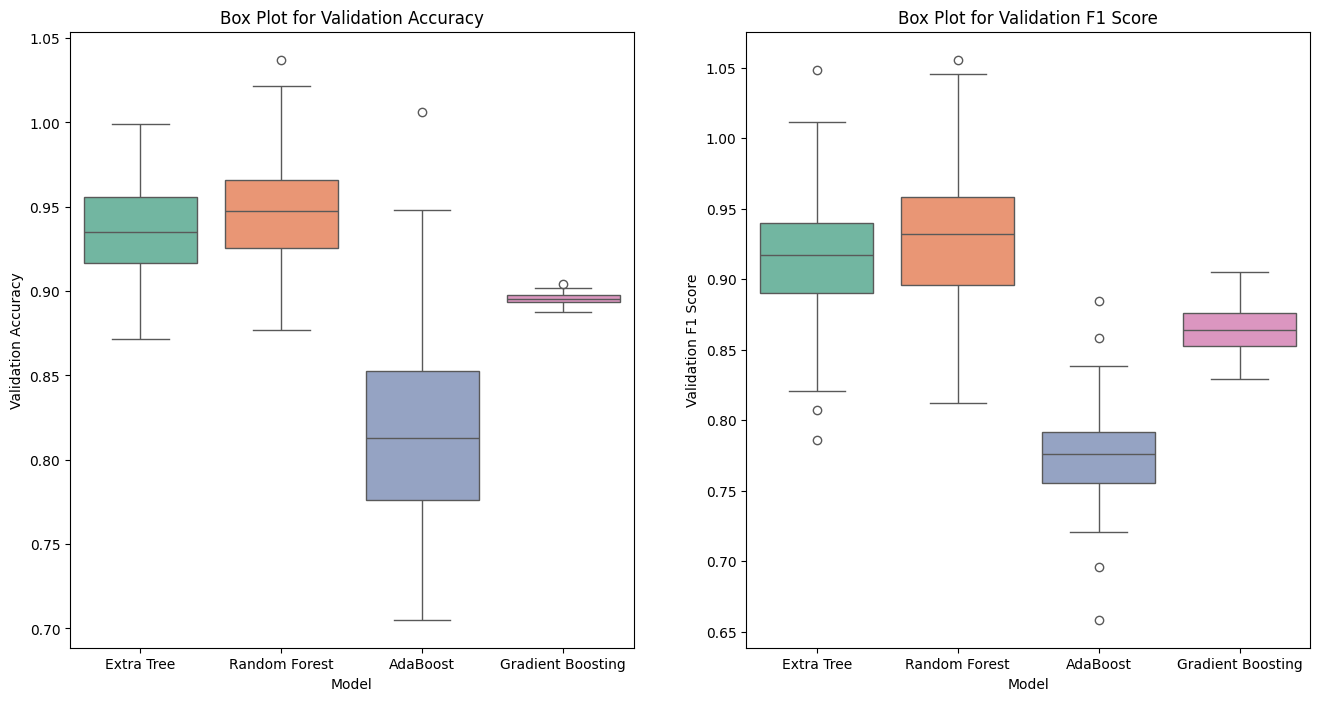

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the generated samples with the model names
accuracy_data = pd.DataFrame({'Model': np.repeat(metrics_df['Model'], 100),
                              'Validation Accuracy': np.concatenate(Validation_Accuracy_set)})
f1_score_data = pd.DataFrame({'Model': np.repeat(metrics_df['Model'], 100),
                              'Validation F1 Score': np.concatenate(Validation_F1_Score_set)})

# Create box plots
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='Model', y='Validation Accuracy', data=accuracy_data, palette='Set2')
plt.title('Box Plot for Validation Accuracy')

plt.subplot(1, 2, 2)
sns.boxplot(x='Model', y='Validation F1 Score', data=f1_score_data, palette='Set2')
plt.title('Box Plot for Validation F1 Score')

plt.show()


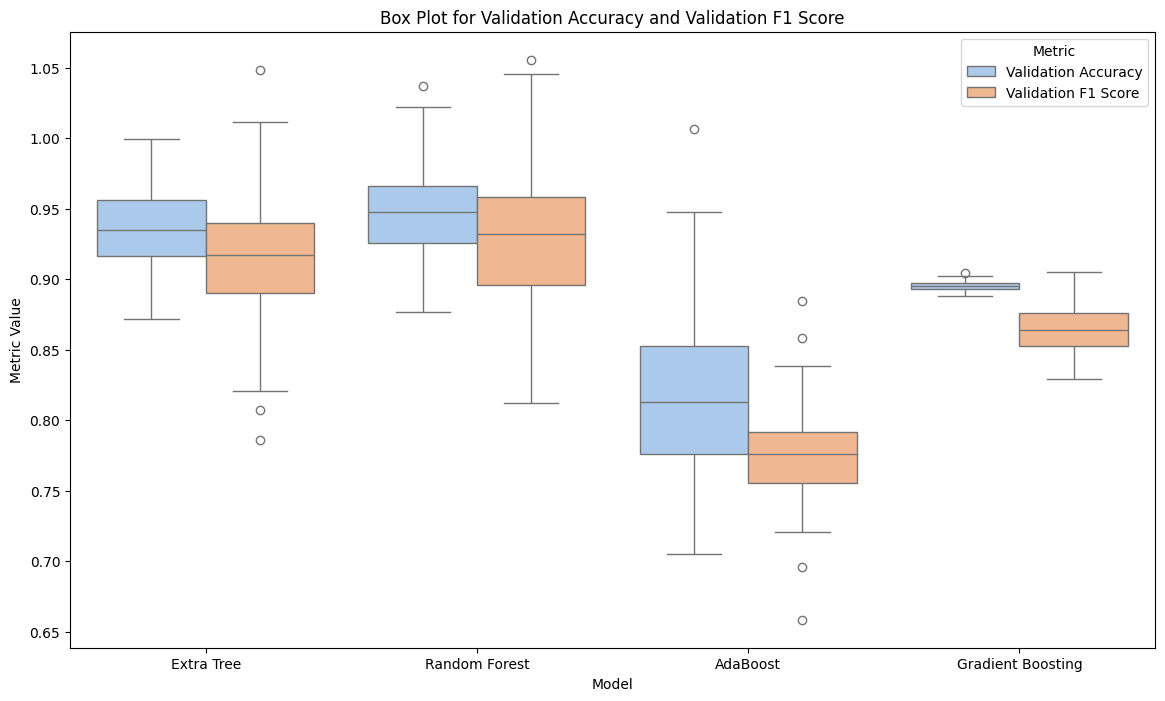

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the generated samples with the model names
accuracy_data = pd.DataFrame({'Model': np.repeat(metrics_df['Model'], 100),
                              'Validation Accuracy': np.concatenate(Validation_Accuracy_set),
                              'Metric': 'Validation Accuracy'})
f1_score_data = pd.DataFrame({'Model': np.repeat(metrics_df['Model'], 100),
                              'Validation F1 Score': np.concatenate(Validation_F1_Score_set),
                              'Metric': 'Validation F1 Score'})

combined_data = pd.concat([accuracy_data, f1_score_data])

# Create a single box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Model', y='value', hue='Metric', data=pd.melt(combined_data, id_vars=['Model', 'Metric']), palette='pastel')
plt.title('Box Plot for Validation Accuracy and Validation F1 Score')
plt.ylabel('Metric Value')
plt.xlabel('Model')
plt.legend(title='Metric')
plt.show()


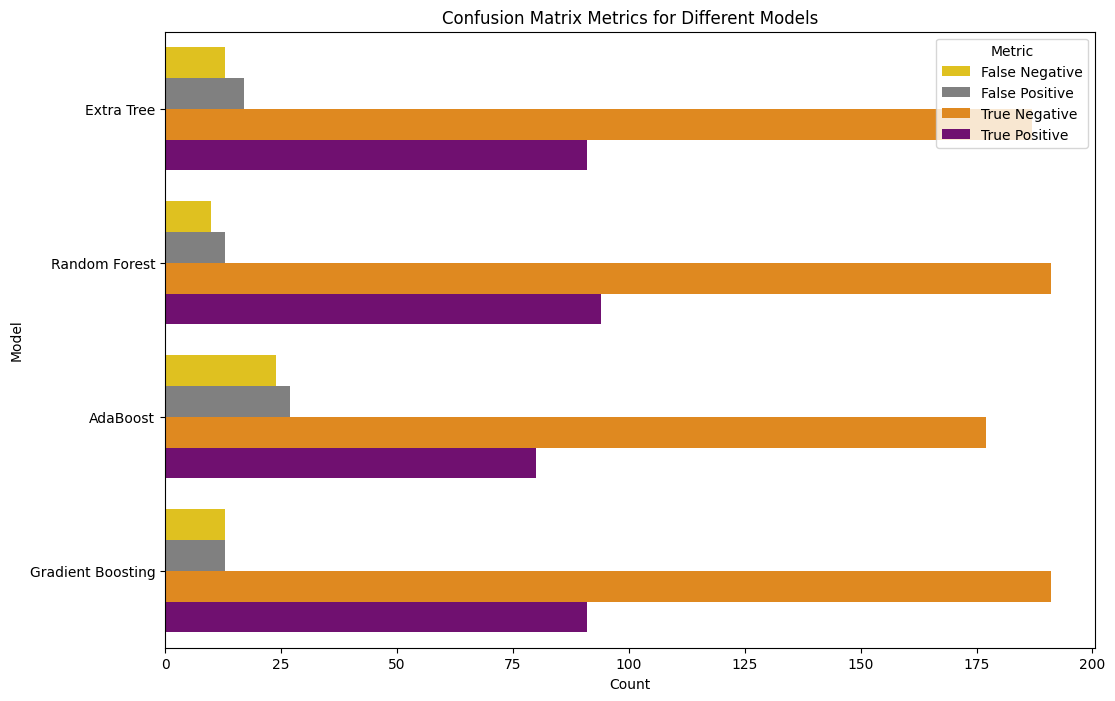

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'metrics_df' is your DataFrame
melted_confusion = pd.melt(metrics_df, id_vars=['Model'], value_vars=['False Negative', 'False Positive','True Negative', 'True Positive'])

# Create horizontal bar graph with custom order, colors, and bar width
plt.figure(figsize=(12, 8))
sns.barplot(x='value', y='Model', hue='variable', data=melted_confusion, palette=['#FFD700', 'grey', '#FF8C00', '#800080'])

plt.title('Confusion Matrix Metrics for Different Models')
plt.xlabel('Count')
plt.ylabel('Model')
plt.legend(title='Metric')
plt.show()


In [74]:
metrics_df['Test Accuracy Average'] = [metrics_df['Test Accuracy'].mean()]*4
metrics_df['Test F1 Average'] = [metrics_df['Test F1 Score'].mean()]*4
metrics_df

,Model,Validation Accuracy,Validation F1 Score,Test Accuracy,Test F1 Score,Test AUC Score,True Negative,False Positive,False Negative,True Positive,Validation Accuracy Std Dev,Validation F1 Score Std Dev,Validation_Accuracy_set,Validation_F1_Score_set,Test Accuracy Average,Test F1 Average
0,Extra Tree,0.934853,0.919355,0.902597,0.858491,0.973039,187,17,13,91,0.024184,0.044139,"[0.9667810171834109, 0.9132507969092682, 0.929...","[0.924265277755077, 0.9284126813124869, 0.8747...",0.894481,0.845695
1,Random Forest,0.944625,0.931174,0.925325,0.890995,0.955552,191,13,10,94,0.031094,0.051048,"[0.925936945079074, 0.9486080158106595, 0.9305...","[0.9130746480034658, 0.9422797585286339, 0.928...",0.894481,0.845695
2,AdaBoost,0.827362,0.772532,0.834416,0.758294,0.904270,177,27,24,80,0.051824,0.031870,"[0.7675697229763415, 0.9478134065655301, 0.729...","[0.826405187079176, 0.8151196006165902, 0.7694...",0.894481,0.845695
3,Gradient Boosting,0.895765,0.866667,0.915584,0.875000,0.928874,191,13,13,91,0.003455,0.016499,"[0.8935368555727188, 0.8936774299246492, 0.898...","[0.8677930609545181, 0.8660162403049106, 0.875...",0.894481,0.845695


In [75]:
# Calculate standard deviation for each row individually
metrics_df['Test Accuracy Std Dev'] = metrics_df[['Test Accuracy', 'Test Accuracy Average']].std(axis=1)
metrics_df['Test F1 Score Std Dev'] = metrics_df[['Test Accuracy', 'Test F1 Average']].std(axis=1)
metrics_df

,Model,Validation Accuracy,Validation F1 Score,Test Accuracy,Test F1 Score,Test AUC Score,True Negative,False Positive,False Negative,True Positive,Validation Accuracy Std Dev,Validation F1 Score Std Dev,Validation_Accuracy_set,Validation_F1_Score_set,Test Accuracy Average,Test F1 Average,Test Accuracy Std Dev,Test F1 Score Std Dev
0,Extra Tree,0.934853,0.919355,0.902597,0.858491,0.973039,187,17,13,91,0.024184,0.044139,"[0.9667810171834109, 0.9132507969092682, 0.929...","[0.924265277755077, 0.9284126813124869, 0.8747...",0.894481,0.845695,0.005740,0.040236
1,Random Forest,0.944625,0.931174,0.925325,0.890995,0.955552,191,13,10,94,0.031094,0.051048,"[0.925936945079074, 0.9486080158106595, 0.9305...","[0.9130746480034658, 0.9422797585286339, 0.928...",0.894481,0.845695,0.021810,0.056307
2,AdaBoost,0.827362,0.772532,0.834416,0.758294,0.904270,177,27,24,80,0.051824,0.031870,"[0.7675697229763415, 0.9478134065655301, 0.729...","[0.826405187079176, 0.8151196006165902, 0.7694...",0.894481,0.845695,0.042472,0.007976
3,Gradient Boosting,0.895765,0.866667,0.915584,0.875000,0.928874,191,13,13,91,0.003455,0.016499,"[0.8935368555727188, 0.8936774299246492, 0.898...","[0.8677930609545181, 0.8660162403049106, 0.875...",0.894481,0.845695,0.014923,0.049419


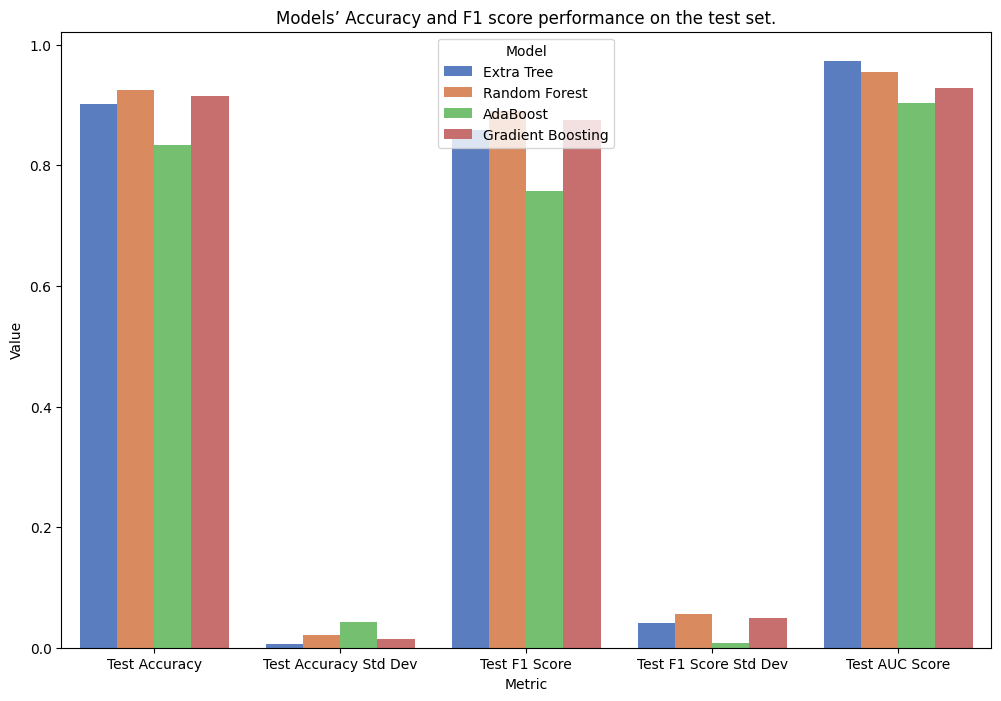

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame for better plotting
melted_metrics = pd.melt(metrics_df, id_vars=['Model'], value_vars=[
    'Test Accuracy', 'Test Accuracy Std Dev',
    'Test F1 Score', 'Test F1 Score Std Dev', 'Test AUC Score'
])

# Create bar graph with custom colors and bar width
plt.figure(figsize=(12, 8))
sns.barplot(x='variable', y='value', hue='Model', data=melted_metrics, palette='muted')

plt.title('Models’ Accuracy and F1 score performance on the test set.')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.legend(title='Model')
plt.show()

In [77]:
metrics_df

,Model,Validation Accuracy,Validation F1 Score,Test Accuracy,Test F1 Score,Test AUC Score,True Negative,False Positive,False Negative,True Positive,Validation Accuracy Std Dev,Validation F1 Score Std Dev,Validation_Accuracy_set,Validation_F1_Score_set,Test Accuracy Average,Test F1 Average,Test Accuracy Std Dev,Test F1 Score Std Dev
0,Extra Tree,0.934853,0.919355,0.902597,0.858491,0.973039,187,17,13,91,0.024184,0.044139,"[0.9667810171834109, 0.9132507969092682, 0.929...","[0.924265277755077, 0.9284126813124869, 0.8747...",0.894481,0.845695,0.005740,0.040236
1,Random Forest,0.944625,0.931174,0.925325,0.890995,0.955552,191,13,10,94,0.031094,0.051048,"[0.925936945079074, 0.9486080158106595, 0.9305...","[0.9130746480034658, 0.9422797585286339, 0.928...",0.894481,0.845695,0.021810,0.056307
2,AdaBoost,0.827362,0.772532,0.834416,0.758294,0.904270,177,27,24,80,0.051824,0.031870,"[0.7675697229763415, 0.9478134065655301, 0.729...","[0.826405187079176, 0.8151196006165902, 0.7694...",0.894481,0.845695,0.042472,0.007976
3,Gradient Boosting,0.895765,0.866667,0.915584,0.875000,0.928874,191,13,13,91,0.003455,0.016499,"[0.8935368555727188, 0.8936774299246492, 0.898...","[0.8677930609545181, 0.8660162403049106, 0.875...",0.894481,0.845695,0.014923,0.049419


The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


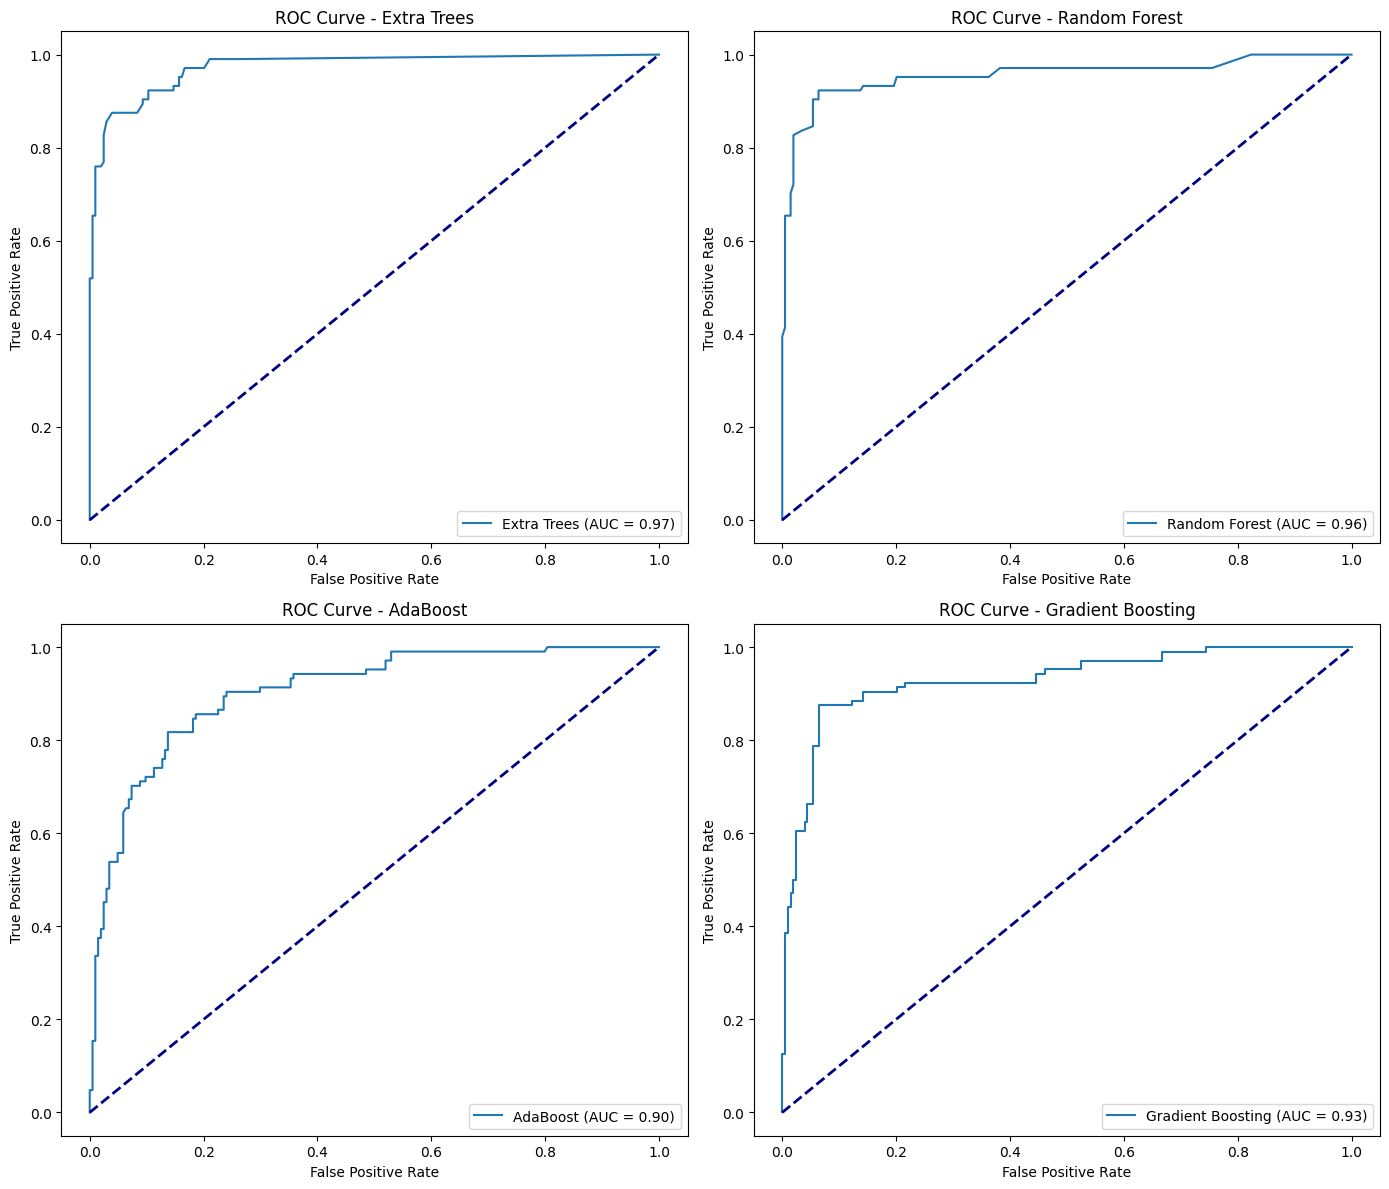

In [78]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming final_diabetes_data is your DataFrame
X = final_diabetes_data.drop('Outcome', axis=1)
y = final_diabetes_data['Outcome']

# Split the data into training (60%), validation (20%), and testing (20%) as per the paper
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=8)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=8)

# Create and train Extra Trees Classifier
extra_trees_classifier = ExtraTreesClassifier(random_state=100)
extra_trees_classifier.fit(X_train, y_train)

# Create and train Random Forest Classifier
random_forest_classifier = RandomForestClassifier(random_state=100)
random_forest_classifier.fit(X_train, y_train)

# Create and train AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(random_state=100)
adaboost_classifier.fit(X_train, y_train)

# Create and train Gradient Boosting Classifier
gradient_boosting_classifier = GradientBoostingClassifier(random_state=100)
gradient_boosting_classifier.fit(X_train, y_train)

# List of classifiers
classifiers = [extra_trees_classifier, random_forest_classifier, adaboost_classifier, gradient_boosting_classifier]
classifier_names = ['Extra Trees', 'Random Forest', 'AdaBoost', 'Gradient Boosting']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
axes = axes.flatten()

for clf, clf_name in zip(classifiers, classifier_names):
    # Predictions on the test set
    y_test_pred = clf.predict(X_test)
    
    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    axes[classifier_names.index(clf_name)].plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')
    axes[classifier_names.index(clf_name)].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[classifier_names.index(clf_name)].set_xlabel('False Positive Rate')
    axes[classifier_names.index(clf_name)].set_ylabel('True Positive Rate')
    axes[classifier_names.index(clf_name)].set_title(f'ROC Curve - {clf_name}')
    axes[classifier_names.index(clf_name)].legend(loc='lower right')

plt.tight_layout()
plt.show()


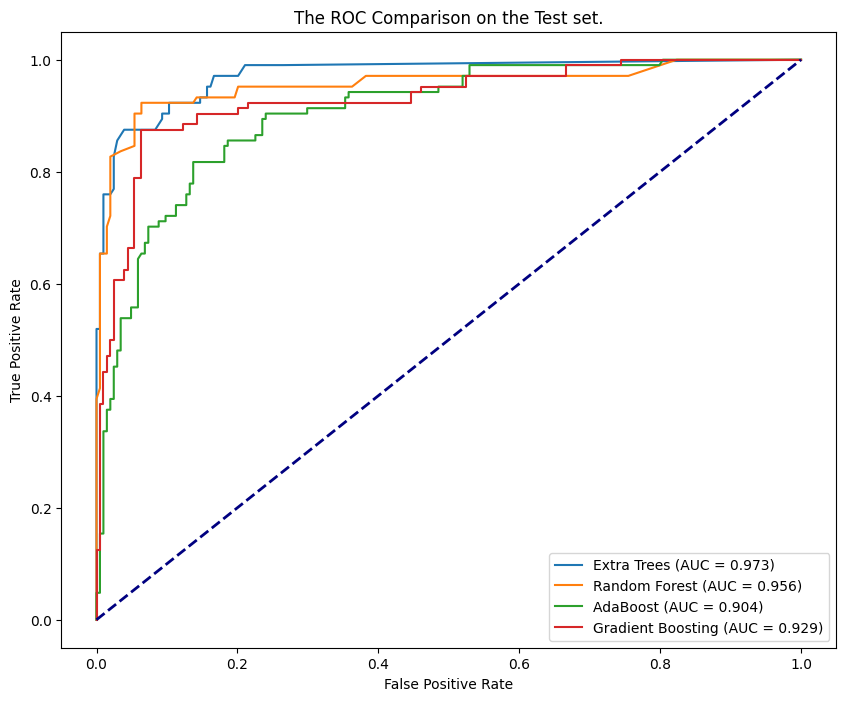

In [79]:
plt.figure(figsize=(10, 8))

for clf, clf_name in zip(classifiers, classifier_names):
    # Predictions on the test set
    y_test_pred = clf.predict(X_test)
    
    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The ROC Comparison on the Test set.')
plt.legend(loc='lower right')
plt.show()